In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

In [39]:
df = pd.read_csv("student-mat.csv", sep=",")

df.columns = df.columns.str.strip()

print(df.columns.tolist())
df.head()


['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status', 'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job', 'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime', 'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class', 'extra_curr_activities', 'nursery', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'Family_quality_reln', 'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2', 'G3']


,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [40]:
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')

df = df.dropna(subset=['G3'])

df['GradeClass'] = pd.cut(df['G3'], bins=[-1, 9, 20], labels=['Fail', 'Pass'])

df[['G3', 'GradeClass']].head()

,G3,GradeClass
0,6,Fail
1,6,Fail
2,10,Pass
3,15,Pass
4,10,Pass


In [41]:
X = df.drop(['G1','G2','G3','GradeClass'], axis=1)  
y = df['GradeClass']

X = pd.get_dummies(X, drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability for ROC curve


✅ Accuracy: 0.7341772151898734

📊 Confusion Matrix (array form):
 [[12 15]
 [ 6 46]]

📋 Classification Report:
               precision    recall  f1-score   support

        Fail       0.67      0.44      0.53        27
        Pass       0.75      0.88      0.81        52

    accuracy                           0.73        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79



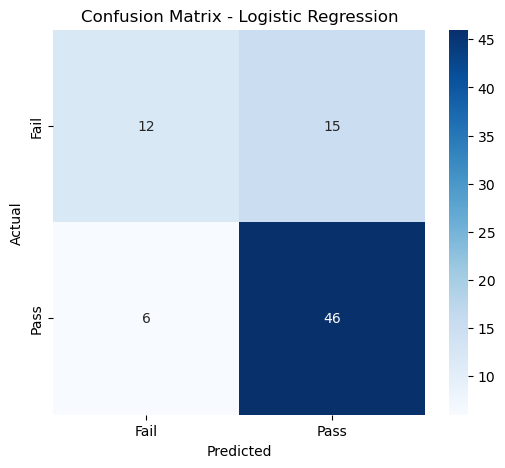

In [44]:
# Ensure y_test and y_pred are strings for consistency
y_test_str = y_test.astype(str)
y_pred_str = pd.Series(y_pred).astype(str)

# ✅ Accuracy
print("✅ Accuracy:", accuracy_score(y_test_str, y_pred_str))

# 📊 Confusion Matrix (array form)
cm = confusion_matrix(y_test_str, y_pred_str, labels=['Fail', 'Pass'])
print("\n📊 Confusion Matrix (array form):\n", cm)

# 📋 Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test_str, y_pred_str, target_names=['Fail', 'Pass']))

# 🌟 Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


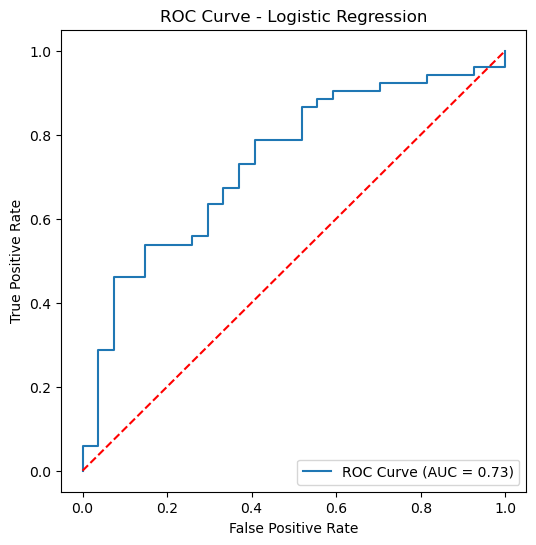

In [45]:
fpr, tpr, thresholds = roc_curve(y_test.map({'Fail':0, 'Pass':1}), y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], 'r--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()
